# 1.b Data inputation process

In [3]:
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import variation
from matplotlib import pyplot as plt
from sklearn.linear_model import (LinearRegression, Ridge,Lasso)
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xgb

def data_process(path):
    #1.b
    raw_data=[]
    raw_label=[]
    #raw_data_non_predictive=[]
    with open(path, encoding='utf8') as file:
        for line in file:
            data=[]
            for item in line.strip().split(','):
                if item=='?':
                    item='NaN'
                data.append(item)
            raw_data.append(data[5:-1])
            raw_label.append([float(data[-1])])
    raw_data=np.array(raw_data)
    imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imr = imr.fit(raw_data[5:])
    imputed_data = imr.transform(raw_data)
    for i in range(len(imputed_data)):
        imputed_data[i] = [round(content,2) for content in imputed_data[i] if content!='NaN']
    data=imputed_data
    return data,raw_label
data,label=data_process('./data/communities.data')
data_train = data[:1495]
data_test = data[1495:]
label_train = label[:1495]
label_test = label[1495:]


# 1.c correlation matrix plot

In [4]:
def correlation_matrix(data):
    #1.c
    print(np.corrcoef(data))
    return np.corrcoef(data)
correlation_matrix=correlation_matrix(data)


[[1.         0.8068414  0.73664704 ... 0.66338147 0.73404426 0.4003973 ]
 [0.8068414  1.         0.63701361 ... 0.58073723 0.70096082 0.43544557]
 [0.73664704 0.63701361 1.         ... 0.64262129 0.54464494 0.29522644]
 ...
 [0.66338147 0.58073723 0.64262129 ... 1.         0.69453967 0.47266083]
 [0.73404426 0.70096082 0.54464494 ... 0.69453967 1.         0.52805334]
 [0.4003973  0.43544557 0.29522644 ... 0.47266083 0.52805334 1.        ]]


# 1.d Calculate the Coeﬃcient of Variation CV

In [5]:
def cal_cv(data):
    #1.d
    print(variation(data, axis=0))
    return(variation(data, axis=0))
cv=cal_cv(data)


[2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67048209 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279 0.41628674 0.47681363 3.48460717

# 1.e highest CV featurs

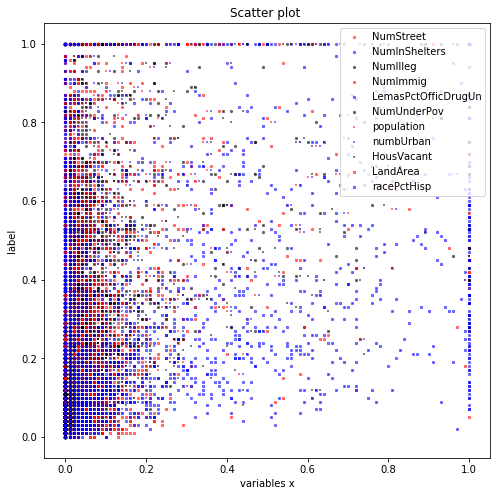

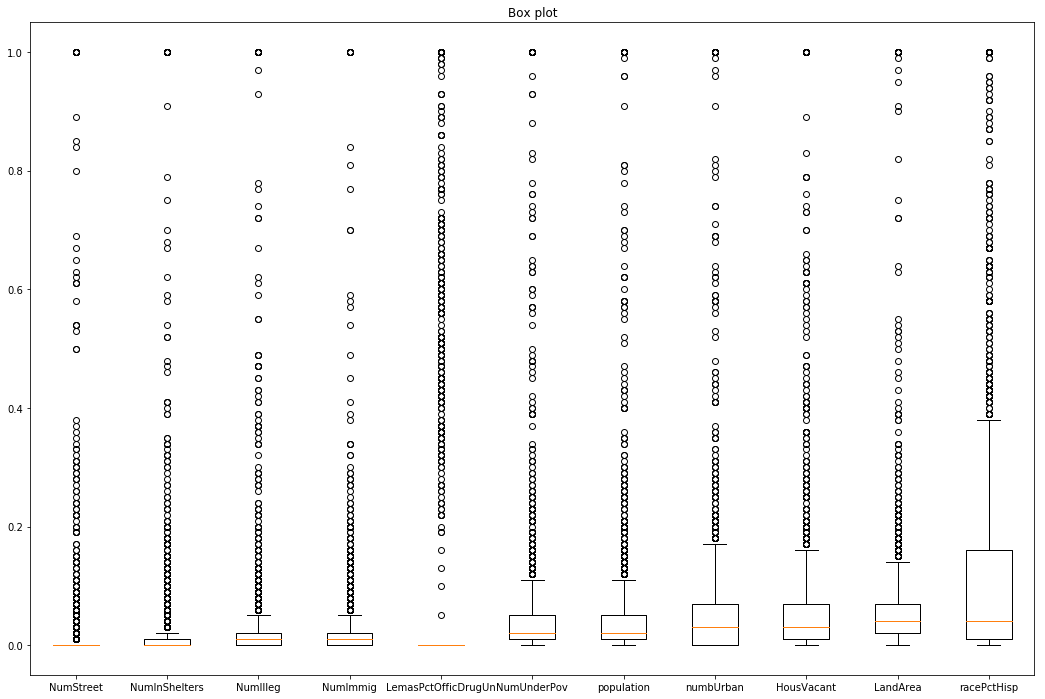

In [18]:
def plot(cv,data,label):
    #1.e
    #highest CV featurs
    features={}
    with open('./data/features', encoding='utf8') as file:
        i=0
        for line in file:
            item=list(content for content in line.strip().split(' '))
            features[i]=item[0]
            i+=1
    cv_new={}
    for i in range(len(cv)):
        cv_new[i]=cv[i]
    cv_new=sorted(cv_new.items(),key=lambda x:x[1],reverse=True)
    key=[]
    feature=[]
    for i in range(11):
        key.append(cv_new[i][0])
        feature.append(features[cv_new[i][0]])
    #print(key,feature)
    #Scatter plot
    plt.figure(figsize=(8,8))
    plt.scatter(data[:, 90], np.array(label), s=5, c='red', marker='o', alpha=0.5, label='NumStreet')
    plt.scatter(data[:, 89], np.array(label), s=5, c='blue', marker='o', alpha=0.5, label='NumInShelters')
    plt.scatter(data[:, 49], np.array(label), s=5, c='black', marker='o', alpha=0.5, label='NumIlleg')
    plt.scatter(data[:, 51], np.array(label), s=5, c='red', marker='X', alpha=0.5, label='NumImmig')
    plt.scatter(data[:, 120], np.array(label), s=5, c='blue', marker='X', alpha=0.5, label='LemasPctOfficDrugUn')
    plt.scatter(data[:, 27], np.array(label), s=5, c='black', marker='X', alpha=0.5, label='NumUnderPov')
    plt.scatter(data[:, 0], np.array(label), s=5, c='red', marker='+', alpha=0.5, label='population')
    plt.scatter(data[:, 10], np.array(label), s=5, c='blue', marker='+', alpha=0.5, label='numbUrban')
    plt.scatter(data[:, 71], np.array(label), s=5, c='black', marker='+', alpha=0.5, label='HousVacant')
    plt.scatter(data[:, 113], np.array(label), s=5, c='red', marker='s', alpha=0.5, label='LandArea')
    plt.scatter(data[:, 5], np.array(label), s=5, c='blue', marker='s', alpha=0.5, label='racePctHisp')
    plt.title('Scatter plot ')
    plt.xlabel('variables x')
    plt.ylabel('label')
    plt.legend(loc='upper right')
    plt.show()

    #Box plot
    data_tmp=[]
    for id in key:
        data_tmp.append(data[:,id])
    data_tmp=np.array(data_tmp).T
    fig = plt.figure(figsize=(18,12))
    plt.boxplot(data_tmp, labels=feature, sym="o")
    plt.title('Box plot')
    plt.show()
plot(cv,data,label)


Answer:We can draw conclusions about signiﬁcance of those features. As you can see in the plot, the higher importance of the feature,the
more possibility of the dot will land on the left side.

# 1.f

In [6]:
def linear_model(data_train,data_test,label_train,label_test):
    #1.f
    clf=LinearRegression()
    clf.fit(data_train,label_train)
    predict=clf.predict(data_test)
    print('linear test MSE:',mean_squared_error(label_test,predict))
    return mean_squared_error(label_test,predict)
linear_mse=linear_model(data_train,data_test,label_train,label_test)


linear test MSE: 2.5498032092477548e+16


# 1.g

In [8]:
def cv_parameter(model_name,data_train,label_train):
    #1.e
    #cv
    from sklearn.grid_search import GridSearchCV
    if model_name=='Ridge':
        parameters = {'alpha': np.logspace(-3,2,10) }
        gsearch1 = GridSearchCV(estimator=Ridge(),
                            param_grid=parameters, cv=3)
        gsearch1.fit(data_train, label_train)
        for key in gsearch1.best_params_.keys():
            return gsearch1.best_params_[key]
    if model_name=='Lasso':
        parameters = {'alpha': np.logspace(-3, 2, 10)}
        gsearch1 = GridSearchCV(estimator=Lasso(),
                                param_grid=parameters, cv=3)
        gsearch1.fit(data_train, label_train)
        for key in gsearch1.best_params_.keys():
            return gsearch1.best_params_[key]
    if model_name=='PCA':
        parameters = {'n_components': [i for i in range(122)]}
        gsearch1 = GridSearchCV(estimator=PCA(),
                                param_grid=parameters, cv=3)
        gsearch1.fit(data_train, label_train)
        for key in gsearch1.best_params_.keys():
            #print('n_components',gsearch1.best_params_[key])
            return gsearch1.best_params_[key]
    if model_name == 'Xgboost':
        param_test = {'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]}
        gsearch1 = GridSearchCV(
            estimator=xgb.XGBRegressor(seed=1113),
            param_grid=param_test, cv=5)
        gsearch1.fit(data_train, label_train)
        for key in gsearch1.best_params_.keys():
            print('reg_alpha:',gsearch1.best_params_[key])
            return gsearch1.best_params_[key]
def ridge_model(data_train,data_test,label_train,label_test):
    #1.g
    alpha=cv_parameter('Ridge',data_train,label_train)
    clf = Ridge(alpha=alpha)
    clf.fit(data_train, label_train)
    predict = clf.predict(data_test)
    print('ridge test MSE:',mean_squared_error(label_test, predict))
    return mean_squared_error(label_test, predict)
ridge_mse=ridge_model(data_train,data_test,label_train,label_test)


ridge test MSE: 0.017608424118316503


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1.h

In [9]:
def LASSO_model(data_train,data_test,label_train,label_test):
    # 1.h
    alpha = cv_parameter('Lasso',data_train, label_train)
    clf = Lasso(alpha=alpha)
    print('model parameters:',clf)
    clf.fit(data_train, label_train)
    predict = clf.predict(data_test)
    print('test MSE:', mean_squared_error(label_test, predict))
    '''clf1 = Lasso(alpha=alpha,)
    print(clf1)
    clf1.fit(data_train, label_train)
    predict = clf1.predict(data_test)'''
    print('LASSO test MSE:', mean_squared_error(label_test, predict))
    return mean_squared_error(label_test, predict)
LASSO_mse=LASSO_model(data_train,data_test,label_train,label_test)


model parameters: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
test MSE: 0.017545288625947664
LASSO test MSE: 0.017545288625947664


# 1.i

In [10]:
def PCR_model(data_train,data_test,label_train,label_test):
    #1.i
    n_components = cv_parameter('PCA', data_test, label_test)
    pca = PCA(n_components=n_components)
    newData = pca.fit_transform(data_train)
    data_test = pca.fit_transform(data_test)
    alpha=cv_parameter('Lasso', newData, label_train)
    clf = Lasso(alpha=alpha)
    clf.fit(newData, label_train)
    predict = clf.predict(data_test)
    print('PCR test MSE:', mean_squared_error(label_test, predict))
    return mean_squared_error(label_test, predict)
PCR_mse=PCR_model(data_train,data_test,label_train,label_test)


PCR test MSE: 0.025542899530669835


# 1.j

In [11]:
def tree(data_train,data_test,label_train,label_test):
    #1.j
    data_train = np.array(data_train)
    label_train = np.array(label_train)
    #data_test = np.array(data_test)
    reg_alpha=cv_parameter('Xgboost', data_train, label_train)
    #dtrain = xgb.DMatrix(data_train, label=label_train)
    #dtest = xgb.DMatrix(data_test)
    regr = xgb.XGBRegressor(reg_alpha=reg_alpha,seed=1113)
    regr.fit(data_train, label_train)
    ypred = regr.predict(data_test)
    print('tree test MSE:', mean_squared_error(label_test, ypred))
    return mean_squared_error(label_test, ypred)
tree_mse=tree(data_train,data_test,label_train,label_test)

reg_alpha: 1
tree test MSE: 0.01688908053081987


As we can see, the out between 1.f and 1.j shows that the tree model shows the best performance, and the MSE on test data is only 0.017. Besides, the MSE is boadly similar on Lasso and Ridge. And the linear model has the worst behavior.